In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# LinearRegresion

####  I took the data that roughly fits the equation y=15+4x.So, the desired value of theta is close to [[15] [4]]

## Absolute cubed error loss function

In [23]:
X_train=pd.read_csv("DataX.csv")
y_train=pd.read_csv("DataY.csv")

X_train.insert(0, 'X0', 1)
X_train.head()

,X0,X1
0,1,2.730820
1,1,8.108788
2,1,0.912790
3,1,0.770963
4,1,5.417380


In [24]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
y_train=np.reshape(y_train, (100, 1))

In [25]:
def cube(M):
    sq=np.multiply(M,M)
    cu=np.multiply(M,sq)
    return cu

def CostFunction(theta,X,y):
    p=np.dot(X,theta)
    cost=np.sum(abs(cube(np.subtract(p,y))))
    return cost

def GradientDescent(X,y,theta,alpha,iterations):
    m=len(y)
    cost_his=np.zeros(iterations)
    theta_his=np.zeros((iterations,2))
    for it in range(iterations):
        q=np.dot(X,theta)
        err=np.subtract(q,y)
        sq_err=np.square(err)
        for i in range(m):
            if err[i]<0:
                sq_err[i]=(-1)*sq_err[i]
        theta=theta-alpha*(X.T.dot((sq_err)))
        theta_his[it,:]=theta.T
        cost_his[it]=CostFunction(theta,X,y)
    return theta, cost_his, theta_his

In [26]:
learning_rate=0.00001
n_itr=10000

theta=np.zeros((2,1))

theta,cost_history,theta_history=GradientDescent(X_train,y_train,theta,learning_rate,n_itr)

print(theta)

[[14.99448849]
 [ 3.90734145]]


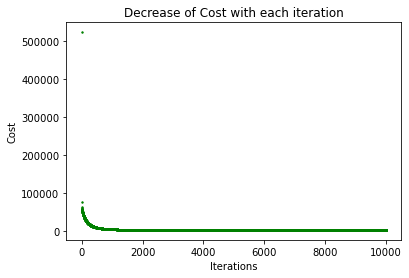

In [27]:
Y_axis=cost_history
X_axis=list(range(1, 10001))

plt.scatter(X_axis, Y_axis,c='green',s=2)

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Decrease of Cost with each iteration')

plt.show()

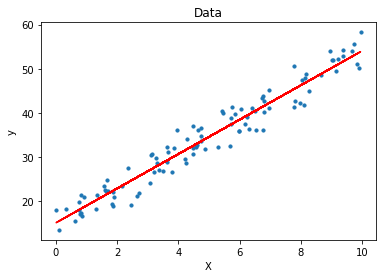

In [28]:
plt.scatter(X_train[:,1], y_train,s=10)

plt.xlabel('X')
plt.ylabel('y')

y_pred=np.dot(X_train,theta)

plt.plot(X_train[:,1],y_pred,color='red')

plt.title('Data')

plt.show()

## Absolute error loss function

In [29]:
def CostFunction(theta,X,y):
    p=np.dot(X,theta)
    cost=np.sum(abs((np.subtract(p,y))))
    return cost

def GradientDescent(X,y,theta,alpha,iterations):
    m=len(y)
    cost_his=np.zeros(iterations)
    theta_his=np.zeros((iterations,2))
    for it in range(iterations):
        q=np.dot(X,theta)
        err=np.subtract(q,y)
        grad=np.ones((m,1))
        for i in range(m):
            if err[i]<0:
                grad[i][0]=(-1)
        theta=theta-alpha*(X.T.dot((grad)))
        theta_his[it,:]=theta.T
        cost_his[it]=CostFunction(theta,X,y)
    return theta, cost_his, theta_his    

In [30]:
learning_rate=0.0001
n_itr=50000

theta=np.zeros((2,1))

theta,cost_history,theta_history=GradientDescent(X_train,y_train,theta,learning_rate,n_itr)

print(theta)

[[14.6476    ]
 [ 4.06246221]]


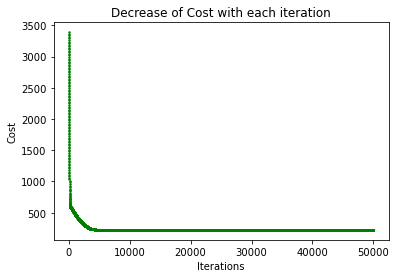

In [31]:
Y_axis=cost_history
X_axis=list(range(1, 50001))

plt.scatter(X_axis, Y_axis,c='green',s=2)

plt.xlabel('Iterations')

plt.ylabel('Cost')

plt.title('Decrease of Cost with each iteration')

plt.show()

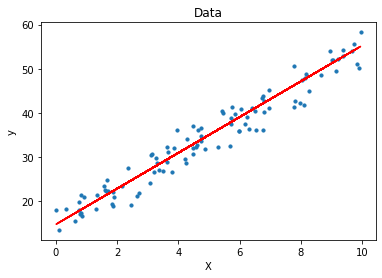

In [32]:
plt.scatter(X_train[:,1], y_train,s=10)

plt.xlabel('X')
plt.ylabel('y')

y_pred=np.dot(X_train,theta)

plt.plot(X_train[:,1],y_pred,color='red')

plt.title('Data')

plt.show()

##### Desired value is close to [[15] [4]]
##### We got,
##### For absolute cubed error loss, theta = [[14.99448849] [3.90734145]]
##### For absolute error loss, theta = [[14.6476] [4.06246221]]
##### So, both cost functions gave us fairly good value of parameters. 

# PolynomialRegresion

####  I took the data that roughly fits the equation y=1+x+2(x^2).So, the desired value of theta is close to [[1] [1] [2]]

## Absolute "fourth degree" error loss function

In [33]:
X_train=pd.read_csv("DataX1.csv")

y_train=pd.read_csv("DataY1.csv")

X_train.insert(0, 'X0', 1)
X_train['X2']=X_train['X1']**2

X_train.head()

,X0,X1,X2
0,1,6.085054,37.027885
1,1,9.489777,90.055860
2,1,-8.109226,65.759541
3,1,-8.502455,72.291749
4,1,-8.092688,65.491601


In [34]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
y_train=np.reshape(y_train, (100, 1))

In [35]:
def cube(M):
    sq=np.multiply(M,M)
    cu=np.multiply(M,sq)
    return cu

def pow4(M):
    sq=np.multiply(M,M)
    p4=np.multiply(sq,sq)
    return p4

def CostFunction(theta,X,y):
    m=len(y)
    p=np.dot(X,theta)
    cost=(np.sum(abs(pow4(np.subtract(p,y)))))
    return cost

def GradientDescent(X,y,theta,alpha,iterations):
    m=len(y)
    cost_his=np.zeros(iterations)
    theta_his=np.zeros((iterations,3))
    for it in range(iterations):
        q=np.dot(X,theta)
        err=np.subtract(q,y)
        cu_err=cube(err)/(m*m)
        for i in range(m):
            if err[i]>0:
                cu_err[i]=(-1)*cu_err[i]
        theta=theta-alpha*(X.T.dot((cu_err)))
        theta_his[it,:]=theta.T
        cost_his[it]=CostFunction(theta,X,y)
    return theta, cost_his, theta_his

In [36]:
learning_rate=0.00000001
n_itr=50000

theta=np.ones((3,1))

theta,cost_history,theta_history=GradientDescent(X_train,y_train,theta,learning_rate,n_itr)

print(theta)

[[1.01463795]
 [0.99882387]
 [1.98143011]]


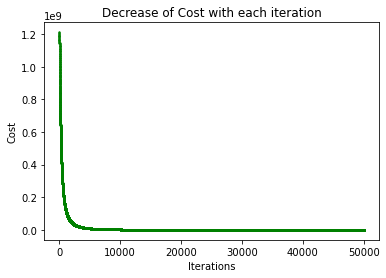

In [37]:
Y_axis=cost_history
X_axis=list(range(1, 50001))

plt.scatter(X_axis, Y_axis,c='green',s=2)

plt.xlabel('Iterations')

plt.ylabel('Cost')

plt.title('Decrease of Cost with each iteration')

plt.show()

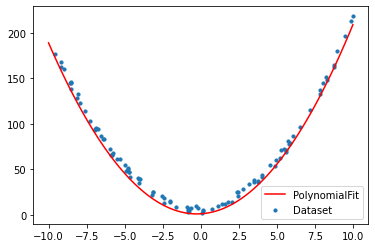

In [38]:
x_train=np.linspace(-10, 10, 100)

y_pred=theta[0][0]+theta[1][0]*(x_train)+theta[2][0]*(x_train**2)

fig, ax = plt.subplots()

plt.scatter(X_train[:,1], y_train,s=10)
ax.plot(x_train, y_pred,c='red')

plt.legend(["PolynomialFit", "Dataset"])

## Absolute "seventh degree" error loss function

In [39]:
def pow6(M):
    sq=np.multiply(M,M)
    cu=np.multiply(M,sq)
    p6=np.multiply(cu,cu)
    return p6

def pow7(M):
    m=pow6(M)
    p7=np.multiply(m,M)
    return p7

def CostFunction(theta,X,y):
    m=len(y)
    p=np.dot(X,theta)
    cost=(np.sum(abs(pow7(np.subtract(p,y)))))/(m*m*m*m)
    return cost

def GradientDescent(X,y,theta,alpha,iterations):
    m=len(y)
    cost_his=np.zeros(iterations)
    theta_his=np.zeros((iterations,3))
    for it in range(iterations):
        q=np.dot(X,theta)
        err=np.subtract(q,y)
        s_err=pow6(err)/(m*m*m*m)
        for i in range(m):
            if err[i]<0:
                s_err[i]=(-1)*s_err[i]
        theta=theta-alpha*(X.T.dot((s_err)))
        theta_his[it,:]=theta.T
        cost_his[it]=CostFunction(theta,X,y)
    return theta, cost_his, theta_his
 

In [40]:
learning_rate=0.000000001
n_itr=50000

theta=np.ones((3,1))

theta,cost_history,theta_history=GradientDescent(X_train,y_train,theta,learning_rate,n_itr)

print(theta)

[[1.00994373]
 [1.02028566]
 [1.83644596]]


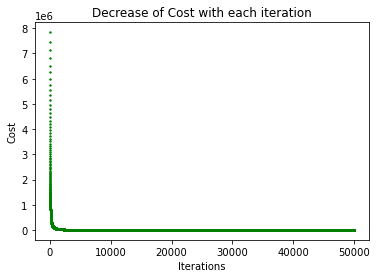

In [41]:
Y_axis=cost_history
X_axis=list(range(1, 50001))

plt.scatter(X_axis, Y_axis,c='green',s=2)

plt.xlabel('Iterations')

plt.ylabel('Cost')

plt.title('Decrease of Cost with each iteration')

plt.show()

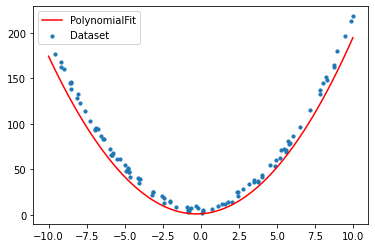

In [42]:
x_train=np.linspace(-10, 10, 100)

y_pred=theta[0][0]+theta[1][0]*(x_train)+theta[2][0]*(x_train**2)

fig, ax = plt.subplots()

plt.scatter(X_train[:,1], y_train,s=10)
ax.plot(x_train, y_pred,c='red')

plt.legend(["PolynomialFit", "Dataset"])

##### Desired value of theta is close to [[1] [1] [2]]
##### We got,
##### For absolute "fourth degree" error loss, theta = [[1.01463795] [0.99882387] [1.98143011]]
##### For absolute "seventh degree" loss, theta = [[1.00994373] [1.02028566] [1.83644596]]
##### Here also, both the cost functions gave us fairly good value of parameters. 